In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [165]:
df = pd.read_csv("Car_sale_ads.csv")
df.head(5)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


Data Cleaning

First We get rid off columns we are not going to use

In [166]:
df.drop(['Offer_location','First_registration_date','Origin_country','Vehicle_generation','Vehicle_version','CO2_emissions','First_owner'], axis = 1, inplace = True) 


Then We will save the new data frame so we won't need to load it every time

In [167]:
df.to_csv('Car_sale_ads_new.csv')

In [168]:
df = pd.read_csv("Car_sale_ads_new.csv")
df.head(5)

,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
1,1,1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,Front wheels,Manual,coupe,2.0,silver,03/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."


First We plot to try to find the outliers for each column and drop them

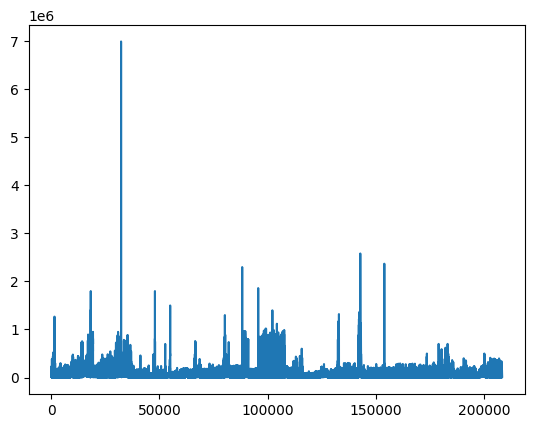

In [169]:
plt.plot(df['Price'])

After Plotting the price column we found that there is one value that didn't make sense so we will drop it

In [170]:
max_Price = df['Price'].idxmax()
df.loc[max_Price]

Unnamed: 0                                                            32304
Index                                                                 32304
Price                                                               6999000
Currency                                                                PLN
Condition                                                              Used
Vehicle_brand                                                           BMW
Vehicle_model                                                            X3
Production_year                                                        2014
Mileage_km                                                         238000.0
Power_HP                                                              190.0
Displacement_cm3                                                     2000.0
Fuel_type                                                            Diesel
Drive                                                       4x4 (permanent)
Transmission

In [171]:
df.drop(index=max_Price, axis=0, inplace=True) 


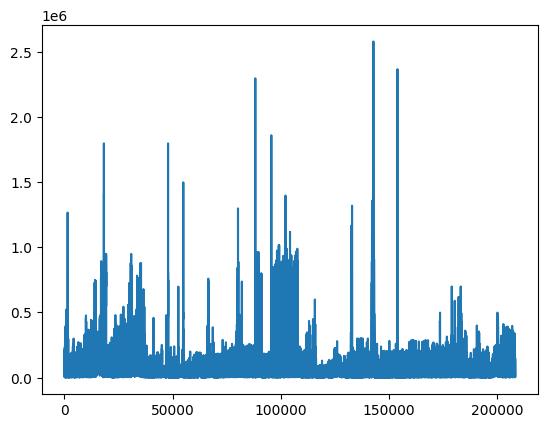

In [172]:
plt.plot(df['Price'])


We won't drop any other values as the price is mostly dependent on the vechicle brand and other columns so it won't be accurate

We will remove every vehicle brand that has only 10 ads or less

In [173]:
#df.groupby('Vehicle_brand').filter(lambda x : len(x)>10)
df = df[df.groupby('Vehicle_brand').Vehicle_brand.transform('count')>10]
df


,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
1,1,1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,Front wheels,Manual,coupe,2.0,silver,03/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208287,208287,208287,19900,PLN,Used,Wołga,GAZ-21,1964,47109.0,75.0,2400.0,Gasoline,Rear wheels,Manual,sedan,5.0,white,29/04/2021,[]
208288,208288,208288,13500,PLN,Used,Wołga,GAZ-24,1974,21417.0,1.0,2445.0,Gasoline,NaN,Manual,sedan,4.0,white,24/04/2021,[]
208289,208289,208289,98000,PLN,Used,Wołga,GAZ-21,1958,33232.0,75.0,2445.0,Gasoline,NaN,Manual,sedan,5.0,black,30/04/2021,[]
208290,208290,208290,14500,PLN,Used,Wołga,Other,1960,89551.0,80.0,2400.0,Gasoline,NaN,Manual,sedan,4.0,gray,02/05/2021,[]


We will now remove the vechicles that has a production year less than or equal 1980 

Production year before dropping the rows

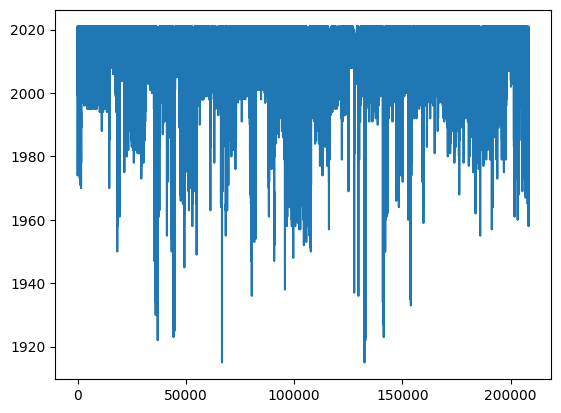

In [174]:
plt.plot(df['Production_year'])

In [175]:
df = df.drop(df[df.Production_year <= 1980].index)
df

,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,5,62950,PLN,Used,Abarth,595,2016,46060.0,180.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208272,208272,208272,6600,PLN,Used,Volvo,S40,2000,192470.0,123.0,1800.0,Gasoline,Front wheels,Manual,sedan,4.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
208282,208282,208282,31000,PLN,Used,Wołga,2410,1989,32500.0,95.0,2445.0,Gasoline,NaN,Manual,sedan,4.0,white,26/04/2021,[]
208283,208283,208283,19900,PLN,Used,Wołga,GAZ-24,1982,98600.0,100.0,2445.0,Gasoline,Front wheels,Manual,sedan,4.0,green,03/05/2021,['Velor upholstery']
208284,208284,208284,27000,PLN,Used,Wołga,GAZ-24,1983,190000.0,105.0,2445.0,Gasoline,Rear wheels,Manual,sedan,4.0,white,29/04/2021,[]


Production year after dropping the rows

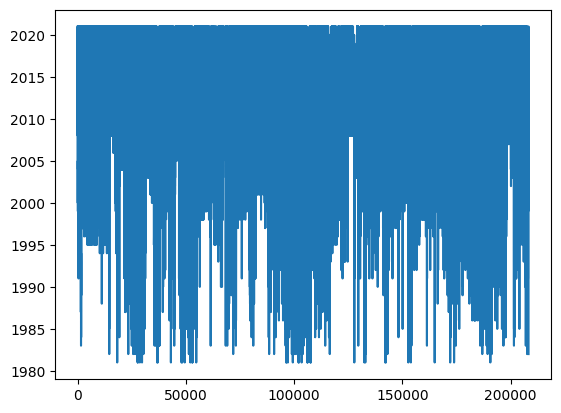

In [176]:
plt.plot(df['Production_year'])

Now we will remove any Vehicle that has more than 500k mileage

Before removing outliers

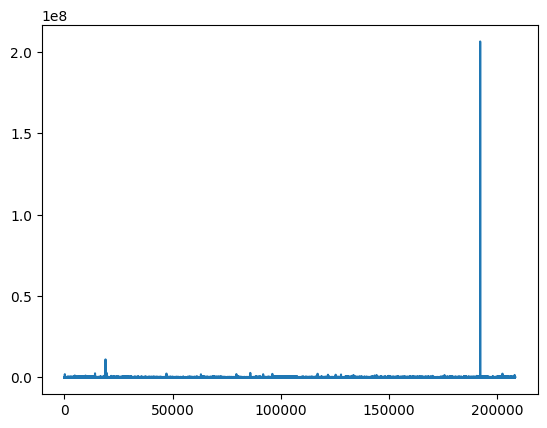

In [177]:
plt.plot(df['Mileage_km'])

In [178]:
df = df.drop(df[df.Mileage_km >= 500000].index)
df

,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,5,62950,PLN,Used,Abarth,595,2016,46060.0,180.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208272,208272,208272,6600,PLN,Used,Volvo,S40,2000,192470.0,123.0,1800.0,Gasoline,Front wheels,Manual,sedan,4.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
208282,208282,208282,31000,PLN,Used,Wołga,2410,1989,32500.0,95.0,2445.0,Gasoline,NaN,Manual,sedan,4.0,white,26/04/2021,[]
208283,208283,208283,19900,PLN,Used,Wołga,GAZ-24,1982,98600.0,100.0,2445.0,Gasoline,Front wheels,Manual,sedan,4.0,green,03/05/2021,['Velor upholstery']
208284,208284,208284,27000,PLN,Used,Wołga,GAZ-24,1983,190000.0,105.0,2445.0,Gasoline,Rear wheels,Manual,sedan,4.0,white,29/04/2021,[]


After removing outliers

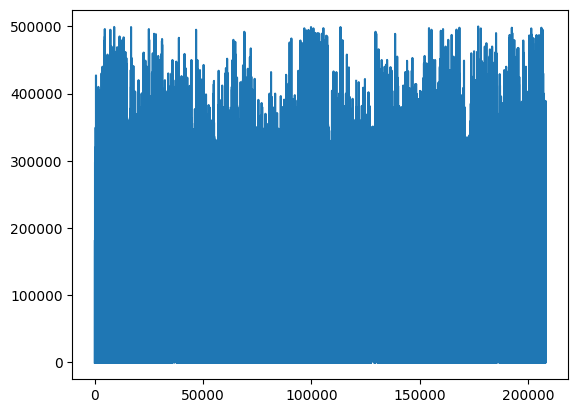

In [179]:
plt.plot(df['Mileage_km'])


Now will remove the vehicles that has a horse power greater than 800 or samller than 50

Before removing outliers

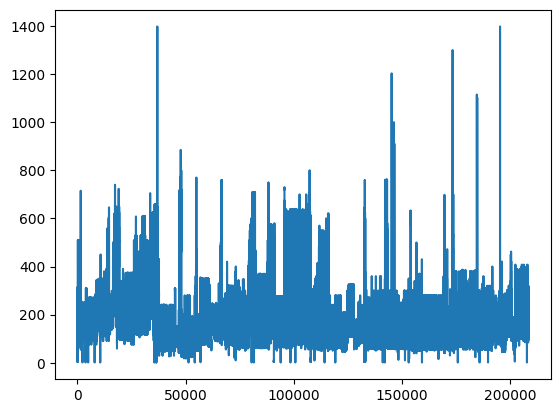

In [180]:
plt.plot(df['Power_HP'])

In [181]:
df = df.drop(df[df.Power_HP >= 800].index)
df


,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,5,62950,PLN,Used,Abarth,595,2016,46060.0,180.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208272,208272,208272,6600,PLN,Used,Volvo,S40,2000,192470.0,123.0,1800.0,Gasoline,Front wheels,Manual,sedan,4.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
208282,208282,208282,31000,PLN,Used,Wołga,2410,1989,32500.0,95.0,2445.0,Gasoline,NaN,Manual,sedan,4.0,white,26/04/2021,[]
208283,208283,208283,19900,PLN,Used,Wołga,GAZ-24,1982,98600.0,100.0,2445.0,Gasoline,Front wheels,Manual,sedan,4.0,green,03/05/2021,['Velor upholstery']
208284,208284,208284,27000,PLN,Used,Wołga,GAZ-24,1983,190000.0,105.0,2445.0,Gasoline,Rear wheels,Manual,sedan,4.0,white,29/04/2021,[]


In [182]:
df = df.drop(df[df.Power_HP <= 50].index)
df

,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,5,62950,PLN,Used,Abarth,595,2016,46060.0,180.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208272,208272,208272,6600,PLN,Used,Volvo,S40,2000,192470.0,123.0,1800.0,Gasoline,Front wheels,Manual,sedan,4.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
208282,208282,208282,31000,PLN,Used,Wołga,2410,1989,32500.0,95.0,2445.0,Gasoline,NaN,Manual,sedan,4.0,white,26/04/2021,[]
208283,208283,208283,19900,PLN,Used,Wołga,GAZ-24,1982,98600.0,100.0,2445.0,Gasoline,Front wheels,Manual,sedan,4.0,green,03/05/2021,['Velor upholstery']
208284,208284,208284,27000,PLN,Used,Wołga,GAZ-24,1983,190000.0,105.0,2445.0,Gasoline,Rear wheels,Manual,sedan,4.0,white,29/04/2021,[]


After removing outliers

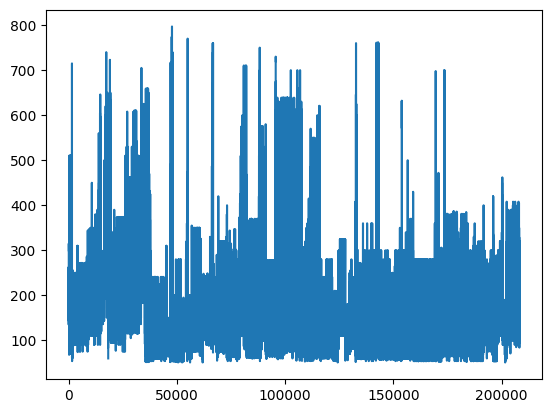

In [183]:
plt.plot(df['Power_HP'])

After seeing the plot for the displacement_cm3 column we found that removing any values won't be nessacary as the values are almost all close

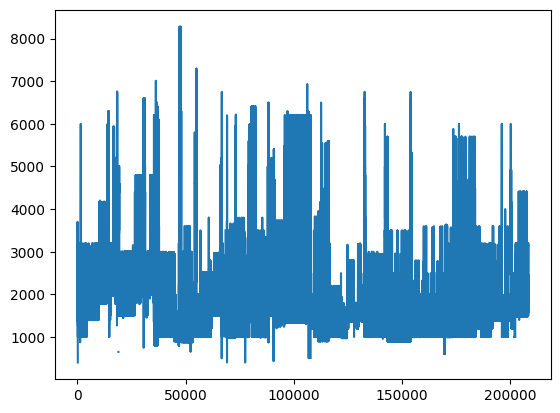

In [184]:
plt.plot(df['Displacement_cm3'])

Now we will remove the outliers for the doors_number that are grater than 7 and samller than 2

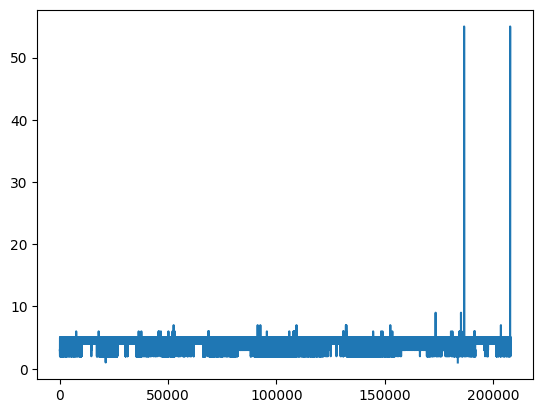

In [185]:
plt.plot(df['Doors_number'])

In [186]:
df = df.drop(df[df.Doors_number > 7].index)
df

,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,5,62950,PLN,Used,Abarth,595,2016,46060.0,180.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208272,208272,208272,6600,PLN,Used,Volvo,S40,2000,192470.0,123.0,1800.0,Gasoline,Front wheels,Manual,sedan,4.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
208282,208282,208282,31000,PLN,Used,Wołga,2410,1989,32500.0,95.0,2445.0,Gasoline,NaN,Manual,sedan,4.0,white,26/04/2021,[]
208283,208283,208283,19900,PLN,Used,Wołga,GAZ-24,1982,98600.0,100.0,2445.0,Gasoline,Front wheels,Manual,sedan,4.0,green,03/05/2021,['Velor upholstery']
208284,208284,208284,27000,PLN,Used,Wołga,GAZ-24,1983,190000.0,105.0,2445.0,Gasoline,Rear wheels,Manual,sedan,4.0,white,29/04/2021,[]


In [188]:
df = df.drop(df[df.Doors_number < 2].index)
df

,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,5,62950,PLN,Used,Abarth,595,2016,46060.0,180.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208272,208272,208272,6600,PLN,Used,Volvo,S40,2000,192470.0,123.0,1800.0,Gasoline,Front wheels,Manual,sedan,4.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
208282,208282,208282,31000,PLN,Used,Wołga,2410,1989,32500.0,95.0,2445.0,Gasoline,NaN,Manual,sedan,4.0,white,26/04/2021,[]
208283,208283,208283,19900,PLN,Used,Wołga,GAZ-24,1982,98600.0,100.0,2445.0,Gasoline,Front wheels,Manual,sedan,4.0,green,03/05/2021,['Velor upholstery']
208284,208284,208284,27000,PLN,Used,Wołga,GAZ-24,1983,190000.0,105.0,2445.0,Gasoline,Rear wheels,Manual,sedan,4.0,white,29/04/2021,[]


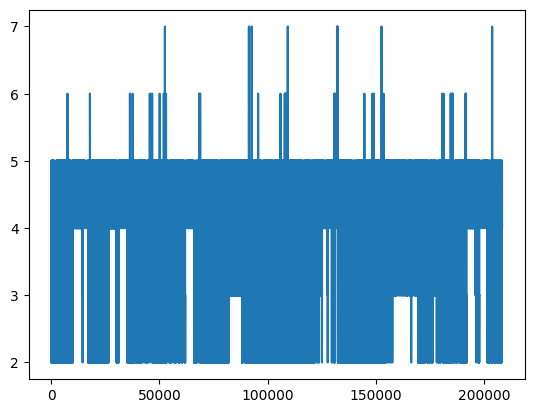

In [189]:
plt.plot(df['Doors_number'])